<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/Cifar10_with_keras_tuner_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()


In [0]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
X_train.max()

255

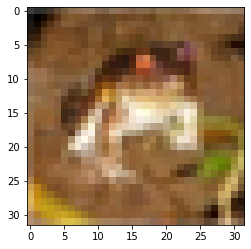

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train.max()

1.0

In [10]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

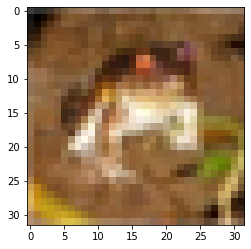

In [11]:
plt.imshow(X_train[0])

In [12]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [0]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 14s 3ms/step - loss: 1.3531 - sparse_categorical_accuracy: 0.5167 - val_loss: 1.2108 - val_sparse_categorical_accuracy: 0.6121
Epoch 2/10
5000/5000 [==============================] - 14s 3ms/step - loss: 1.0587 - sparse_categorical_accuracy: 0.6259 - val_loss: 1.1205 - val_sparse_categorical_accuracy: 0.6381
Epoch 3/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.9589 - sparse_categorical_accuracy: 0.6632 - val_loss: 1.0727 - val_sparse_categorical_accuracy: 0.6586
Epoch 4/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.8979 - sparse_categorical_accuracy: 0.6852 - val_loss: 0.9929 - val_sparse_categorical_accuracy: 0.6801
Epoch 5/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.8512 - sparse_categorical_accuracy: 0.6995 - val_loss: 0.9743 - val_sparse_categorical_accuracy: 0.6803
Epoch 6/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.8075 -

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

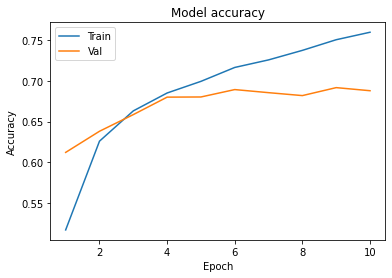

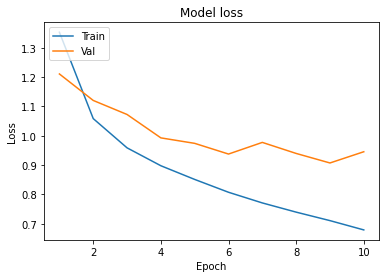

In [17]:
epoch_range=range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
!pip install keras-tuner

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [0]:
def build_model(hp):  
  model = keras.Sequential([
    Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    Dropout(rate=hp.Float('dropout_1_layer',min_value=0.0001,max_value=0.1,step=16)
           ),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    MaxPool2D(pool_size=hp.Int('max_pool1_layer', min_value=1, max_value=5),
              strides=2,
              padding='valid'
            ),
    Dropout(rate=hp.Float('dropout_1_layer',min_value=0.0001,max_value=0.1,step=16)
           ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
  
  return model

In [0]:
tuner_search=RandomSearch(build_model,
                          objective='val_sparse_categorical_accuracy',
                          max_trials=5,project_name="cifer10_model")

In [28]:
tuner_search.search(X_train, y_train,epochs=5,validation_split=0.1)

Epoch 1/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5227 - sparse_categorical_accuracy: 0.4499 - val_loss: 1.3237 - val_sparse_categorical_accuracy: 0.5268
Epoch 2/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2172 - sparse_categorical_accuracy: 0.5665 - val_loss: 1.1653 - val_sparse_categorical_accuracy: 0.5878
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0511 - sparse_categorical_accuracy: 0.6290 - val_loss: 1.1005 - val_sparse_categorical_accuracy: 0.6144
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9394 - sparse_categorical_accuracy: 0.6690 - val_loss: 1.0730 - val_sparse_categorical_accuracy: 0.6312
Epoch 5/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8389 - sparse_categorical_accuracy: 0.7032 - val_loss: 1.0752 - val_sparse_categorical_accuracy: 0.6312


Epoch 1/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6336 - sparse_categorical_accuracy: 0.4108 - val_loss: 1.4234 - val_sparse_categorical_accuracy: 0.4758
Epoch 2/5
1407/1407 [==============================] - 6s 5ms/step - loss: 1.3376 - sparse_categorical_accuracy: 0.5230 - val_loss: 1.3071 - val_sparse_categorical_accuracy: 0.5346
Epoch 3/5
1407/1407 [==============================] - 6s 5ms/step - loss: 1.2032 - sparse_categorical_accuracy: 0.5693 - val_loss: 1.2645 - val_sparse_categorical_accuracy: 0.5554
Epoch 4/5
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0994 - sparse_categorical_accuracy: 0.6073 - val_loss: 1.1773 - val_sparse_categorical_accuracy: 0.5848
Epoch 5/5
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0207 - sparse_categorical_accuracy: 0.6370 - val_loss: 1.2131 - val_sparse_categorical_accuracy: 0.5782


Epoch 1/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4817 - sparse_categorical_accuracy: 0.4653 - val_loss: 1.2059 - val_sparse_categorical_accuracy: 0.5758
Epoch 2/5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1529 - sparse_categorical_accuracy: 0.5934 - val_loss: 1.1425 - val_sparse_categorical_accuracy: 0.6030
Epoch 3/5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9949 - sparse_categorical_accuracy: 0.6506 - val_loss: 1.0491 - val_sparse_categorical_accuracy: 0.6324
Epoch 4/5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8871 - sparse_categorical_accuracy: 0.6878 - val_loss: 0.9731 - val_sparse_categorical_accuracy: 0.6668
Epoch 5/5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7917 - sparse_categorical_accuracy: 0.7214 - val_loss: 0.9922 - val_sparse_categorical_accuracy: 0.6626


Epoch 1/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3277 - sparse_categorical_accuracy: 0.1001 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.1064
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3039 - sparse_categorical_accuracy: 0.0980 - val_loss: 2.3037 - val_sparse_categorical_accuracy: 0.0958
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3043 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0976
Epoch 4/5
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3039 - sparse_categorical_accuracy: 0.0987 - val_loss: 2.3038 - val_sparse_categorical_accuracy: 0.0958
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3039 - sparse_categorical_accuracy: 0.1025 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.1064


Epoch 1/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4288 - sparse_categorical_accuracy: 0.4898 - val_loss: 1.2030 - val_sparse_categorical_accuracy: 0.5734
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1075 - sparse_categorical_accuracy: 0.6109 - val_loss: 1.0392 - val_sparse_categorical_accuracy: 0.6348
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9819 - sparse_categorical_accuracy: 0.6547 - val_loss: 1.0225 - val_sparse_categorical_accuracy: 0.6468
Epoch 4/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8993 - sparse_categorical_accuracy: 0.6860 - val_loss: 0.9753 - val_sparse_categorical_accuracy: 0.6608
Epoch 5/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8285 - sparse_categorical_accuracy: 0.7073 - val_loss: 0.9321 - val_sparse_categorical_accuracy: 0.6760


INFO:tensorflow:Oracle triggered exit


In [0]:
model=tuner_search.get_best_models(num_models=1)[0]

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 48)        3648      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 48)        57648     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense (Dense)                (None, 112)               5

In [31]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.9593 - sparse_categorical_accuracy: 0.6644 - val_loss: 1.0024 - val_sparse_categorical_accuracy: 0.6555
Epoch 2/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.8700 - sparse_categorical_accuracy: 0.6981 - val_loss: 1.0409 - val_sparse_categorical_accuracy: 0.6507
Epoch 3/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.8091 - sparse_categorical_accuracy: 0.7149 - val_loss: 1.0358 - val_sparse_categorical_accuracy: 0.6652
Epoch 4/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.7626 - sparse_categorical_accuracy: 0.7317 - val_loss: 1.0123 - val_sparse_categorical_accuracy: 0.6691
Epoch 5/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.7164 - sparse_categorical_accuracy: 0.7479 - val_loss: 1.0357 - val_sparse_categorical_accuracy: 0.6694
Epoch 6/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.6780 -

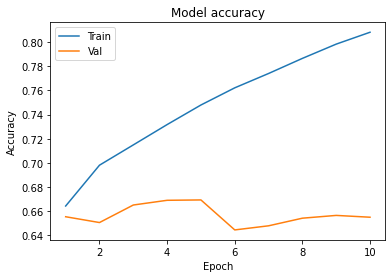

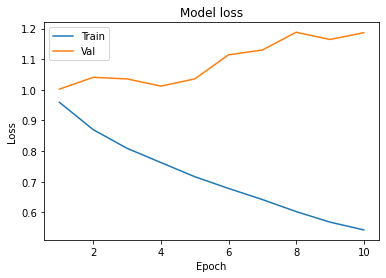

In [32]:
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()